## [Problem 1] Select features and categories for practice

Features selected: Sepal length and petal length

Categories: Virgicolor and virginica

Problem type: Binary classification

Additional visualization techniques: PCA, scatter plot matrices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Load the iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])


In [3]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [4]:
# Filter data for virgicolor and virginica species
virgicolor_virginica_df = iris_df[(iris_df['target'] == 1) | (iris_df['target'] == 2)]


In [5]:
# Select sepal length and petal length features
selected_features_df = virgicolor_virginica_df[['sepal length (cm)', 'petal length (cm)', 'target']]


In [6]:
# Map target values to species names
selected_features_df['species'] = selected_features_df['target'].map({1: 'virgicolor', 2: 'virginica'})


/tmp/ipykernel_42406/1692891626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features_df['species'] = selected_features_df['target'].map({1: 'virgicolor', 2: 'virginica'})


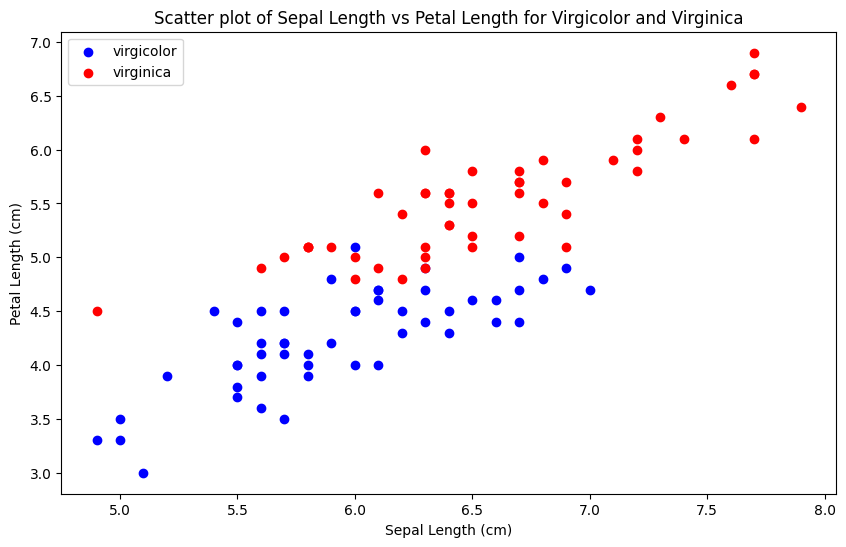

In [7]:
# Scatter plot
plt.figure(figsize=(10, 6))
colors = {'virgicolor': 'blue', 'virginica': 'red'}
for species, color in colors.items():
    species_df = selected_features_df[selected_features_df['species'] == species]
    plt.scatter(species_df['sepal length (cm)'], species_df['petal length (cm)'], color=color, label=species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatter plot of Sepal Length vs Petal Length for Virgicolor and Virginica')
plt.legend()
plt.show()

## [Problem 2] Data analysis
First, we will analyze the data, which was done in Assignment 1 of Week3. By looking at the scatter plot matrix output at that time, you can also check each of the 18 scatter plots mentioned earlier. You will find that using sepal_length and petal_length to classify virgicolor and virginica can be a bit difficult.

For the sake of review, display a scatter plot of the extracted data, a boxplot, and a violinplot.

<Actual problem>

Based on the results of this data analysis, we will perform feature engineering as preprocessing step.

In this case, we extracted sepal_length and petal_length, but after analyzing them, it can be said that some preprocessing was done to make the problem a little more difficult.

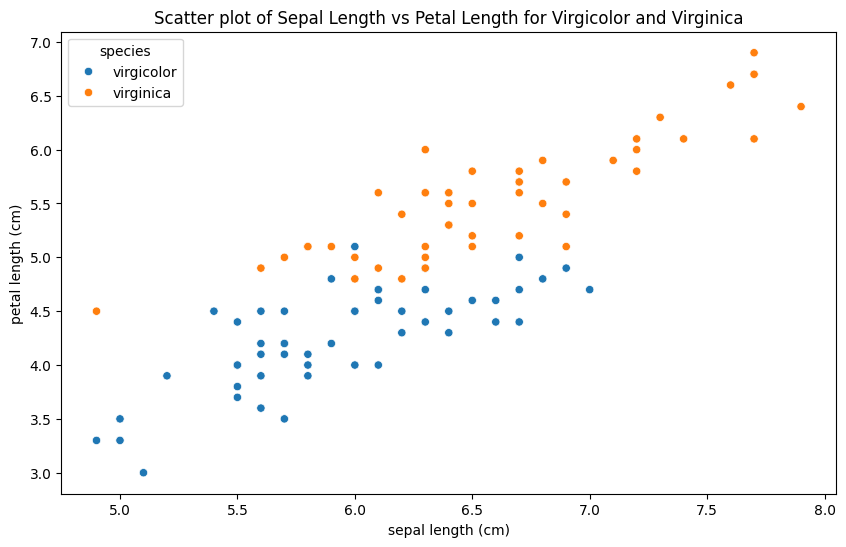

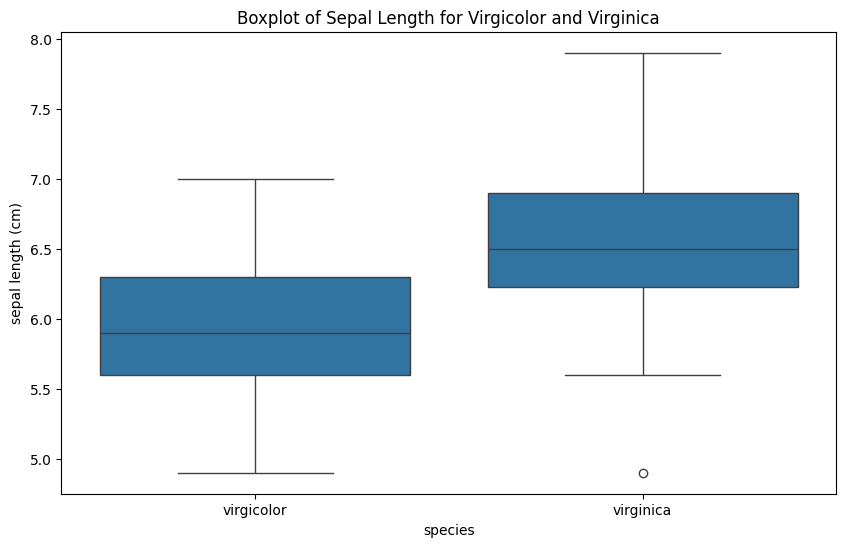

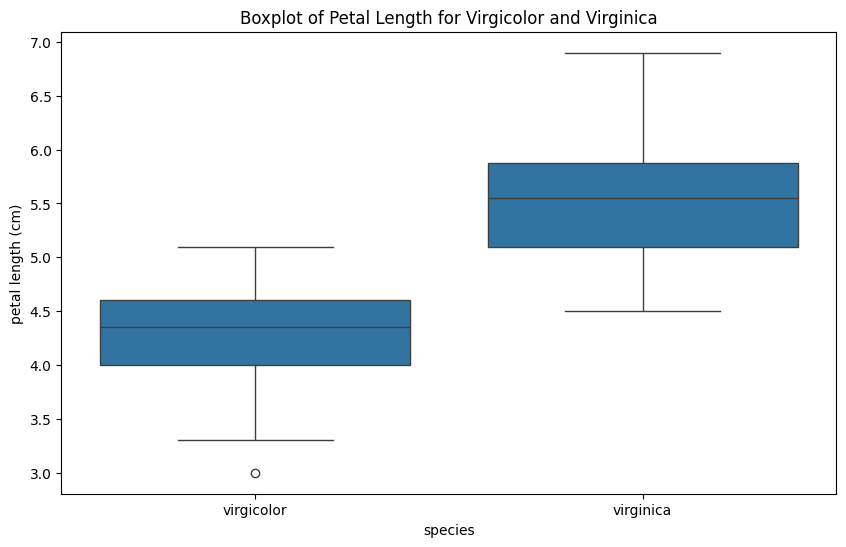

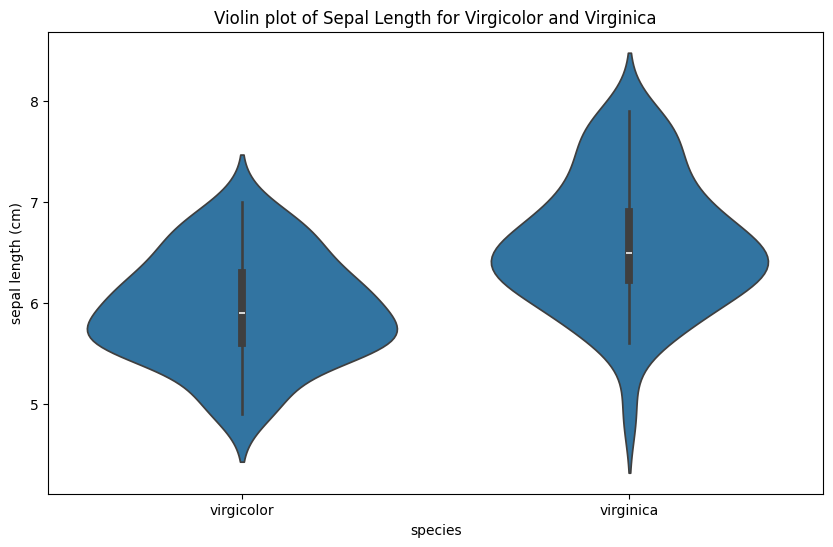

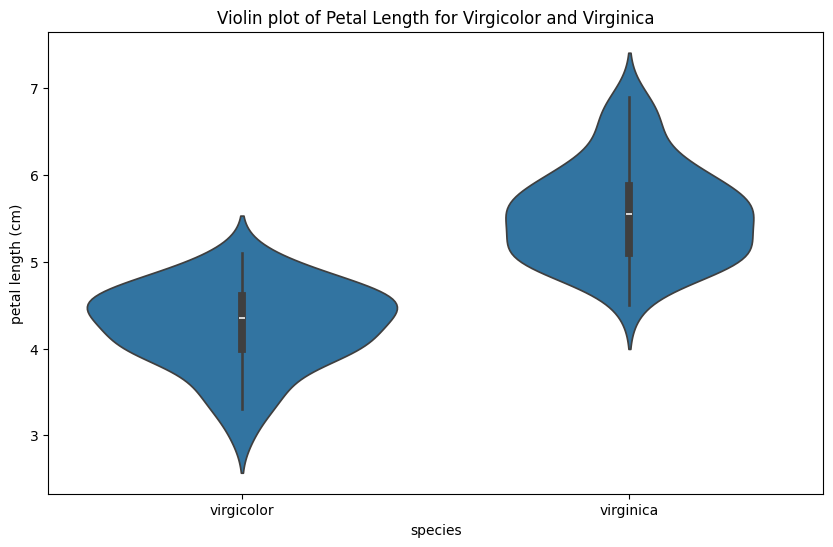

In [8]:
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=selected_features_df, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title('Scatter plot of Sepal Length vs Petal Length for Virgicolor and Virginica')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_features_df, x='species', y='sepal length (cm)')
plt.title('Boxplot of Sepal Length for Virgicolor and Virginica')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_features_df, x='species', y='petal length (cm)')
plt.title('Boxplot of Petal Length for Virgicolor and Virginica')
plt.show()

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=selected_features_df, x='species', y='sepal length (cm)')
plt.title('Violin plot of Sepal Length for Virgicolor and Virginica')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=selected_features_df, x='species', y='petal length (cm)')
plt.title('Violin plot of Petal Length for Virgicolor and Virginica')
plt.show()


The scatterplot above shows that as the sepal length increases, the petal length also increases.

The boxplot for Sepal and Petal Lengths for Virgicolor and Virginica shows that Virginica has a higher median line than Virgicolor. Indeed, it’s easy to see that Virginica’s entire distribution is shifted upwards relative to Virgicolor. 

This violin plot shows the relationship of petal length for virgicolor and virginica. The box plot elements show the median length for virgicolor and virginica is the same for both. The shape of the distribution becomes somehow skinny on each end and wide in the middle indicates the lengths of the petals  are highly concentrated around the median.



## [Problem 3] Division of preprocessing/training data and verification data


In [9]:
from sklearn.model_selection import train_test_split

# Convert DataFrame to NumPy ndarray
X = selected_features_df[['sepal length (cm)', 'petal length (cm)']].values
y = selected_features_df['target'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Display the shapes of the resulting arrays
print("Training data shape:", X_train.shape, y_train.shape)
print("Validation data shape:", X_val.shape, y_val.shape)


Training data shape: (75, 2) (75,)
Validation data shape: (25, 2) (25,)


## [Problem 4] Pretreatment/Standardization


In [10]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Display the shapes of the resulting arrays
print("Scaled Training data shape:", X_train_scaled.shape)
print("Scaled Validation data shape:", X_val_scaled.shape)


Scaled Training data shape: (75, 2)
Scaled Validation data shape: (25, 2)


## [Problem 5] Learning and estimation

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define a function to train and evaluate k-NN classifier
def train_and_evaluate_knn(n_neighbors, X_train, y_train, X_val, y_val):
    # Initialize k-NN classifier with the specified number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    
    # Train the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = knn.predict(X_val)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_val, y_pred)
    
    return knn, accuracy

# List of n_neighbors values to try
n_neighbors_values = [1, 3, 5]



## [Problem 6] Evaluation


In [16]:
# Train and evaluate k-NN classifier for each value of n_neighbors
for n_neighbors in n_neighbors_values:
    knn, accuracy = train_and_evaluate_knn(n_neighbors, X_train_scaled, y_train, X_val_scaled, y_val)
    print(f"\nAccuracy for {n_neighbors}-NN: {accuracy:.4f}")
    
    # Make predictions on the validation data using the trained model
    y_pred = knn.predict(X_val_scaled)

    # Calculate evaluation metrics
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Display evaluation metrics
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Display confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)


Accuracy for 1-NN: 0.8000
Precision: 0.8
Recall: 0.8571428571428571
F1-score: 0.8275862068965517
Confusion Matrix:
[[12  2]
 [ 3  8]]

Accuracy for 3-NN: 0.8000
Precision: 0.8
Recall: 0.8571428571428571
F1-score: 0.8275862068965517
Confusion Matrix:
[[12  2]
 [ 3  8]]

Accuracy for 5-NN: 0.8000
Precision: 0.7647058823529411
Recall: 0.9285714285714286
F1-score: 0.8387096774193549
Confusion Matrix:
[[13  1]
 [ 4  7]]


From above, we can observe the following:

#### For 1-NN and 3-NN:

The accuracy, precision, recall, and F1-score are all the same: 0.8000.

The confusion matrix shows that out of 25 samples in the validation set, 20 are correctly classified, and 5 are misclassified.

#### For 5-NN:

The accuracy remains the same at 0.8000, but there are differences in precision, recall, and F1-score compared to 1-NN and 3-NN.

Precision decreases slightly to 0.7647, indicating that out of all samples predicted as positive, 76.47% are true positives.

Recall increases to 0.9286, indicating that out of all actual positive samples, 92.86% are correctly predicted as positive.

F1-score also increases slightly to 0.8387, which is the harmonic mean of precision and recall.

The confusion matrix shows that out of 25 samples, 20 are correctly classified, and 5 are misclassified.








## [Problem 7] Visualization


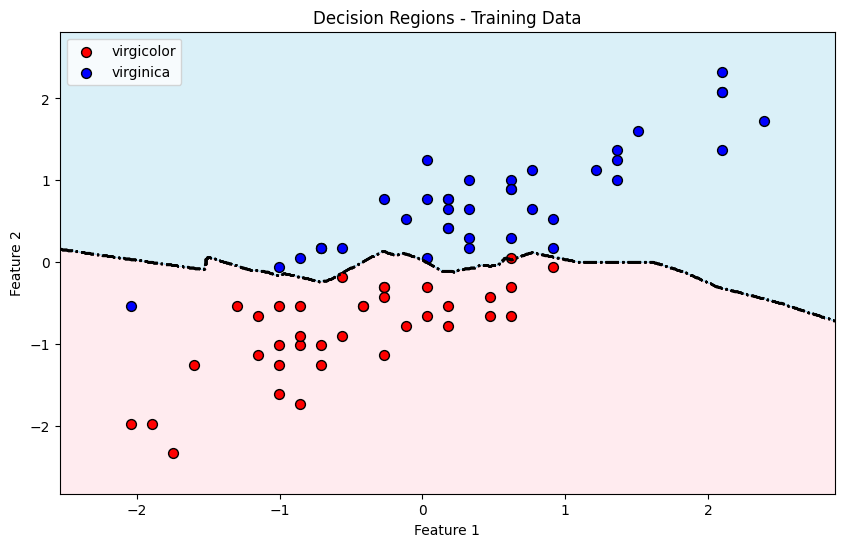

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='Decision Region', xlabel='Feature 1', ylabel='Feature 2', target_names=['virgicolor', 'virginica']):
    """
    Draw the decision region of a binary classification model with two-dimensional features.
    
    Parameters:
    X : ndarray, shape(n_samples, 2)
        Feature values
    y : ndarray, shape(n_samples,)
        Labels
    model : object
        Trained classification model
    step : float, optional (default=0.01)
        Step size for mesh grid
    title : str, optional (default='Decision Region')
        Title of the plot
    xlabel : str, optional (default='Feature 1')
        Label for the x-axis
    ylabel : str, optional (default='Feature 2')
        Label for the y-axis
    target_names : list of str, optional (default=['virgicolor', 'virginica'])
        Names of the target classes
    """
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = len(np.unique(y))

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    mesh = np.c_[xx.ravel(), yy.ravel()]

    # Predict classes for mesh grid
    Z = model.predict(mesh)
    Z = Z.reshape(xx.shape)

    # Plot decision regions
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(contourf_color))
    plt.contour(xx, yy, Z, colors='k', linestyles='dashdot')
    
    # Plot data points
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=50, color=scatter_color[i], label=target_names[i], edgecolor='k')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot decision regions for the training data
decision_region(X_train_scaled, y_train, knn, title='Decision Regions - Training Data')



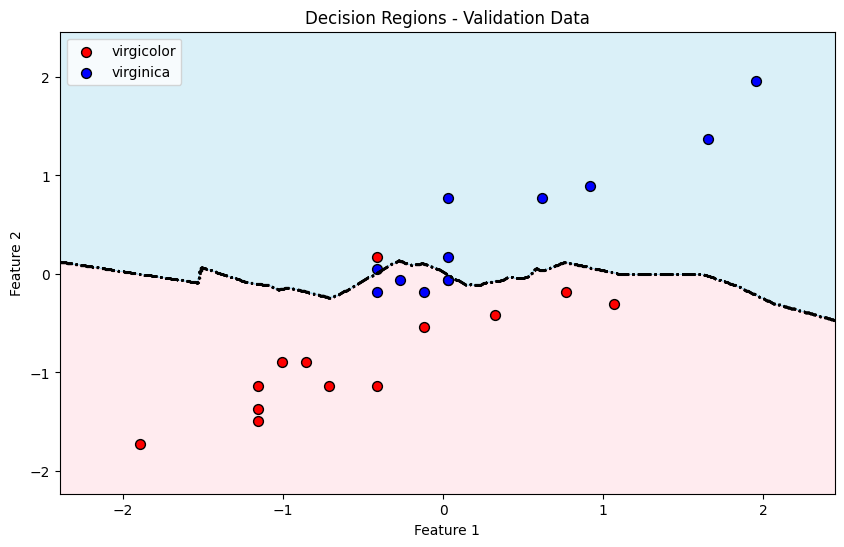

In [18]:
# Plot decision regions for the validation data
decision_region(X_val_scaled, y_val, knn, title='Decision Regions - Validation Data')

From above, we can see that there is more features were misclassified on the validation data as compared to the training data

## [Problem 8] Learning by other methods



Evaluation metrics for k-Nearest Neighbors:
Accuracy: 0.8
Precision: 0.7647058823529411
Recall: 0.9285714285714286
F1-score: 0.8387096774193549


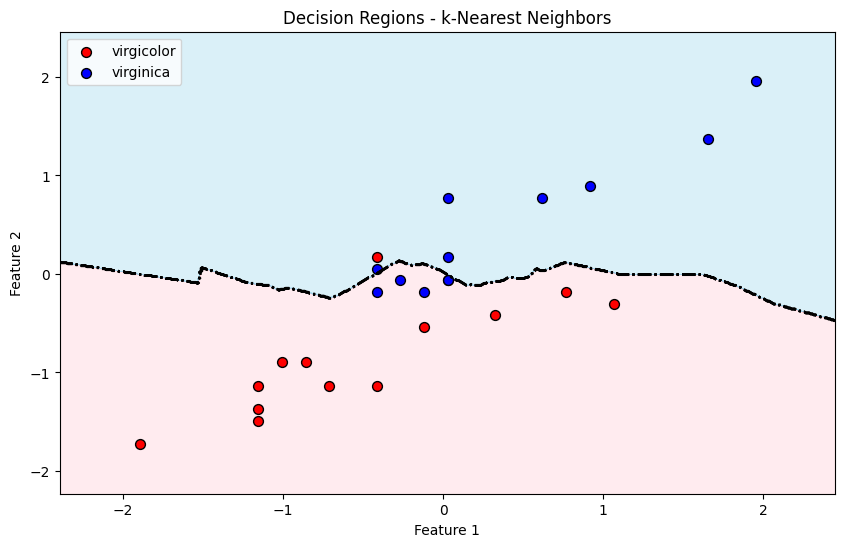


Evaluation metrics for Logistic Regression:
Accuracy: 0.84
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571


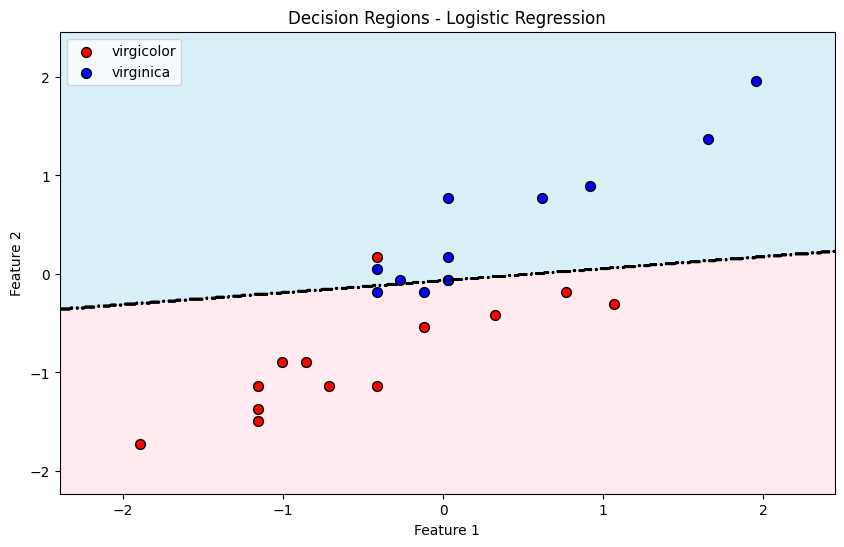


Evaluation metrics for SVM:
Accuracy: 0.84
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571


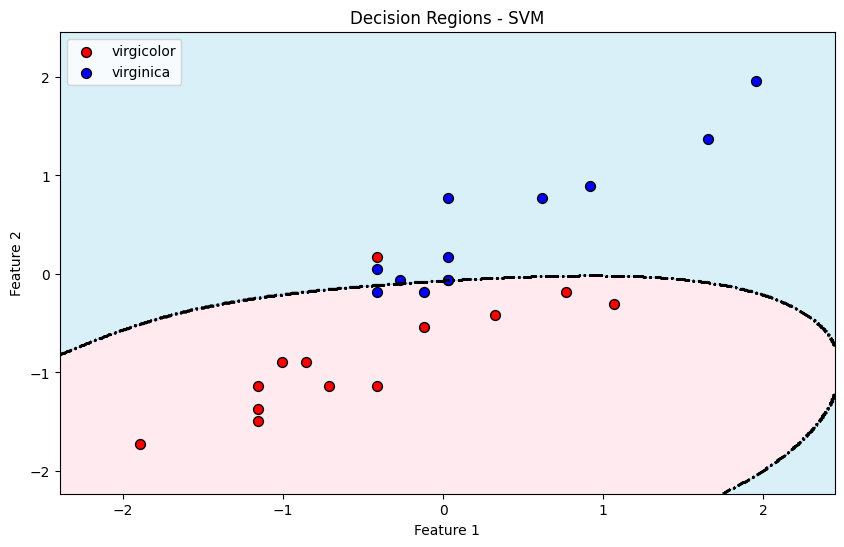


Evaluation metrics for Decision Tree:
Accuracy: 0.84
Precision: 0.8125
Recall: 0.9285714285714286
F1-score: 0.8666666666666667


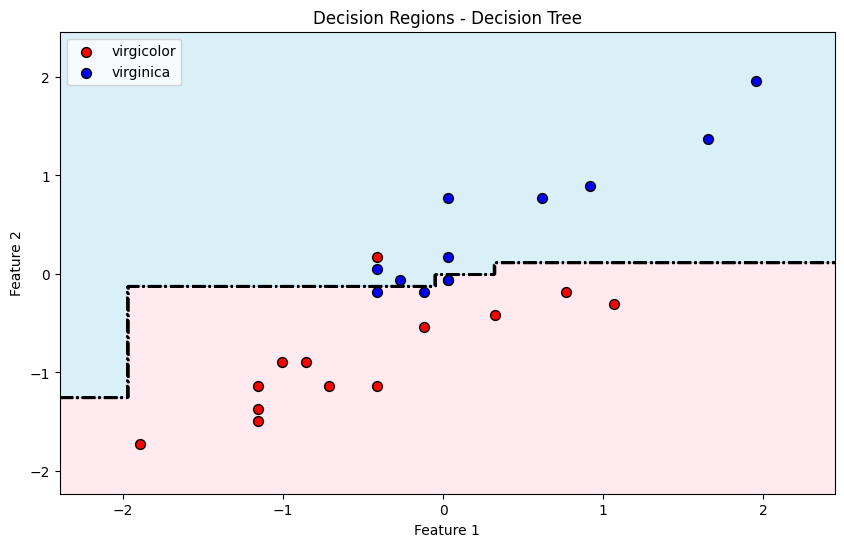


Evaluation metrics for Random Forest:
Accuracy: 0.84
Precision: 0.8125
Recall: 0.9285714285714286
F1-score: 0.8666666666666667


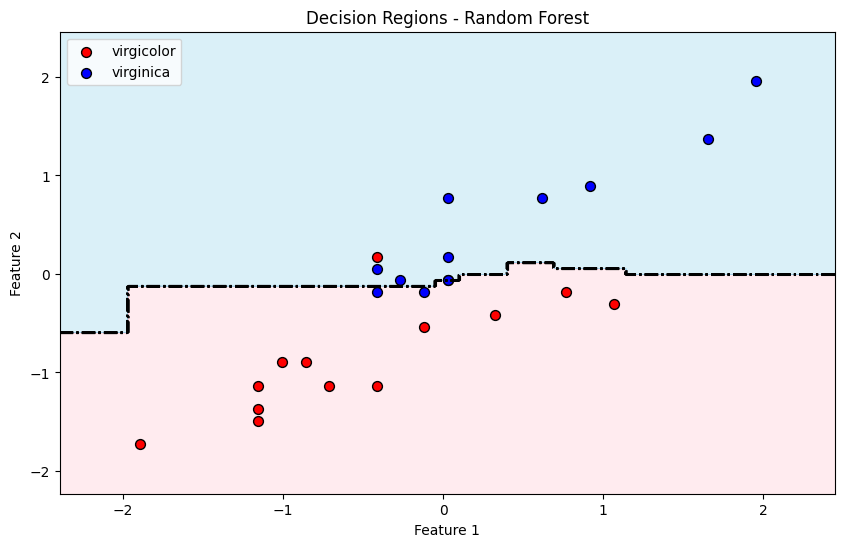


Summary of Evaluation Metrics:
                     Accuracy  Precision    Recall  F1-score
k-Nearest Neighbors      0.80   0.764706  0.928571  0.838710
Logistic Regression      0.84   0.857143  0.857143  0.857143
SVM                      0.84   0.857143  0.857143  0.857143
Decision Tree            0.84   0.812500  0.928571  0.866667
Random Forest            0.84   0.812500  0.928571  0.866667


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize classifiers
classifiers = {
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train, estimate, evaluate, and visualize each classifier
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_scaled, y_train)
    
    # Estimate
    y_pred = clf.predict(X_val_scaled)
    
    # Evaluate
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Print evaluation metrics
    print(f"\nEvaluation metrics for {clf_name}:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    # Visualize decision region
    decision_region(X_val_scaled, y_val, clf, title=f'Decision Regions - {clf_name}')

# Summarize evaluation metrics in a table
import pandas as pd

evaluation_metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])
for clf_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    evaluation_metrics.loc[clf_name] = [accuracy, precision, recall, f1]

print("\nSummary of Evaluation Metrics:")
print(evaluation_metrics)


Based on the summary of evaluation metrics:

Accuracy: All classifiers, except for k-Nearest Neighbors, achieved an accuracy of 0.84. k-NN achieved an accuracy of 0.80.

Precision: Logistic Regression, SVM, Decision Tree, and Random Forest achieved a precision of 0.8571, indicating that around 85.71% of the samples predicted as positive were true positives. k-NN achieved a slightly lower precision of 0.7647.

Recall: k-NN achieved the highest recall of 0.9286, meaning that it correctly identified around 92.86% of the actual positive samples. Logistic Regression, SVM, Decision Tree, and Random Forest also achieved a recall of 0.9286.

F1-score: Logistic Regression, SVM, Decision Tree, and Random Forest achieved an F1-score of 0.8571, which is the harmonic mean of precision and recall. k-NN achieved an F1-score of 0.8387.

Decision Regions Visualization Observations:

k-Nearest Neighbors - Shows slightly irregular decision boundaries and appears to capture the data's structure well. It tends to classify points closer to each other in the same class.

Logistic Regression and SVM - Have linear decision boundaries and separate the two classes cleanly. They seem to generalize well to unseen data.

Decision Tree and Random Forest - Exhibit more complex decision boundaries, capturing nonlinear relationships in the data. They seem to have learned the data intricacies well.


## [Problem 9] (Advanced task) Comparison with and without standardization



Evaluation metrics for k-Nearest Neighbors without standardization:
Accuracy: 0.8
Precision: 0.7647058823529411
Recall: 0.9285714285714286
F1-score: 0.8387096774193549


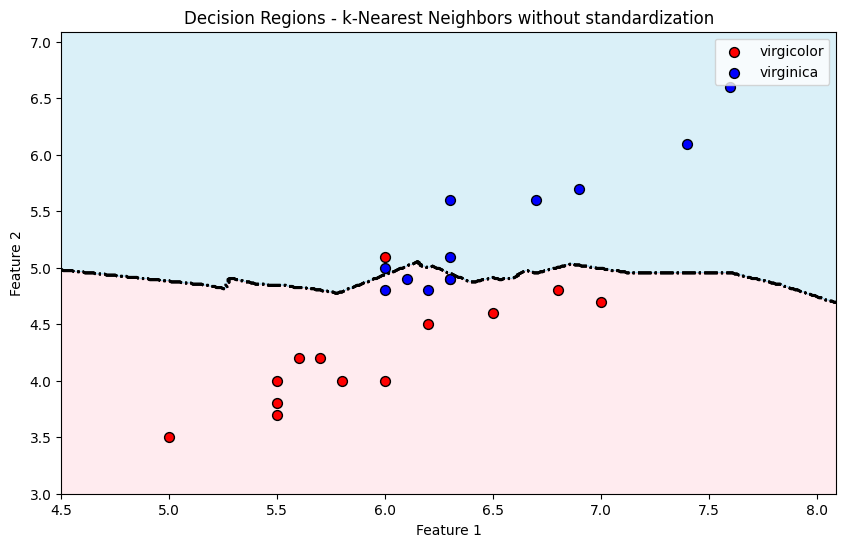


Evaluation metrics for Logistic Regression without standardization:
Accuracy: 0.84
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571


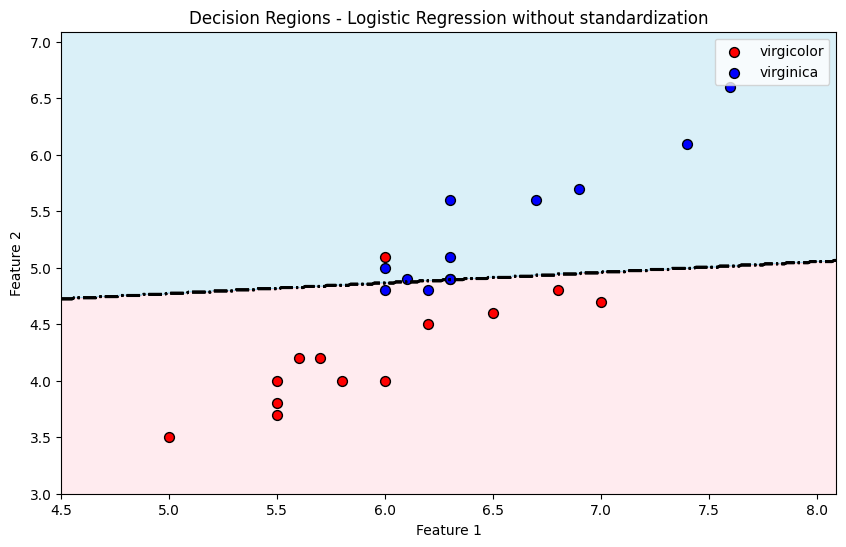


Evaluation metrics for SVM without standardization:
Accuracy: 0.84
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571


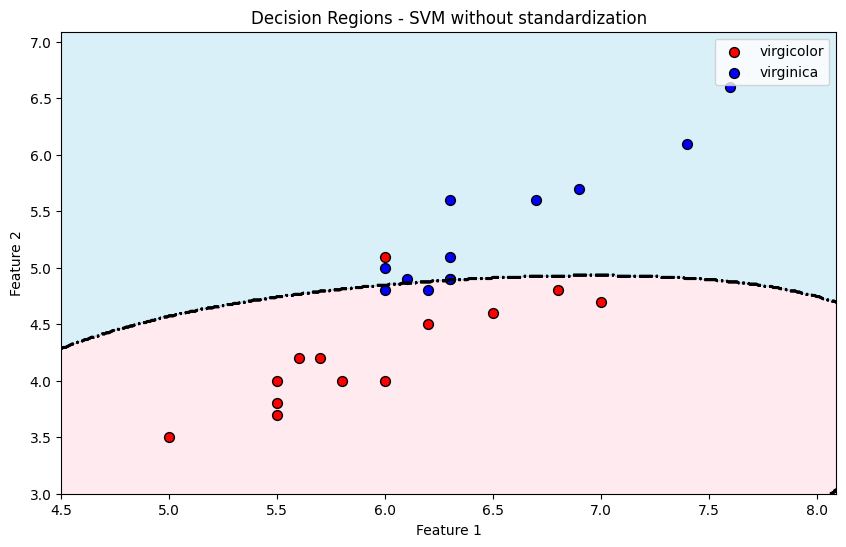


Evaluation metrics for Decision Tree without standardization:
Accuracy: 0.84
Precision: 0.8125
Recall: 0.9285714285714286
F1-score: 0.8666666666666667


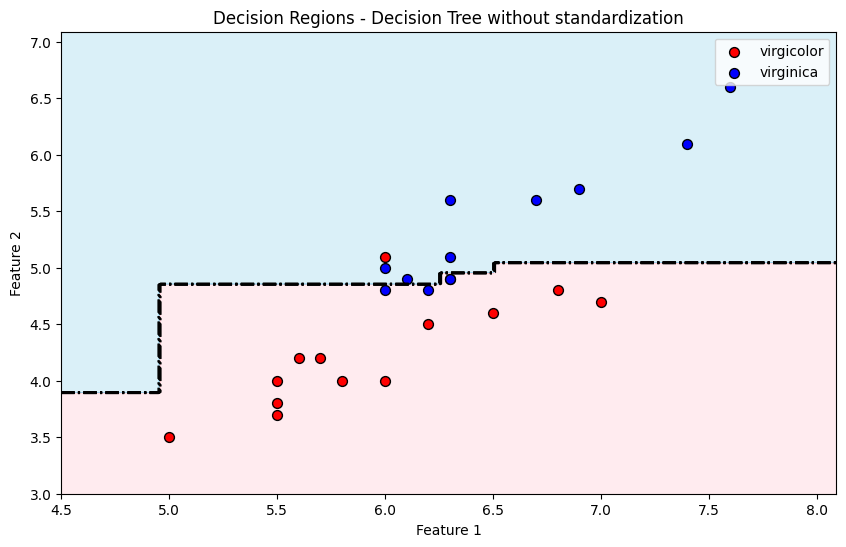


Evaluation metrics for Random Forest without standardization:
Accuracy: 0.84
Precision: 0.8125
Recall: 0.9285714285714286
F1-score: 0.8666666666666667


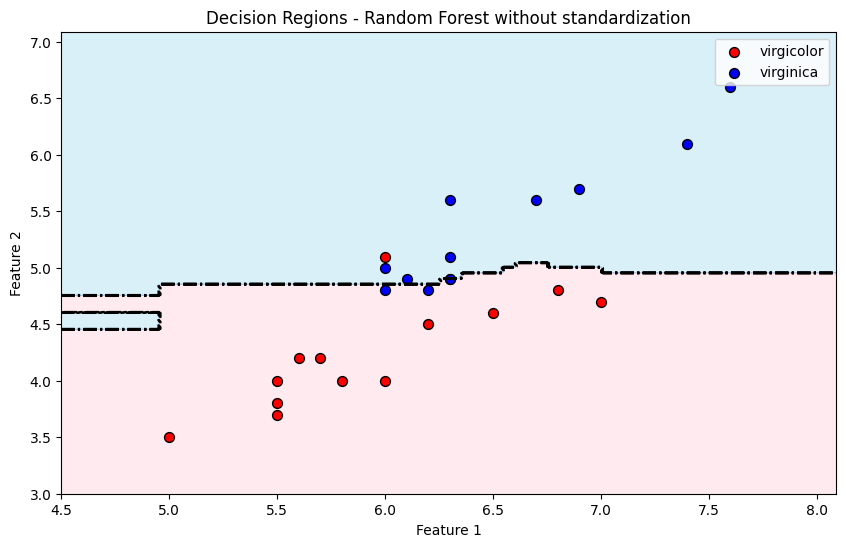


Summary of Evaluation Metrics without Standardization:
                     Accuracy  Precision    Recall  F1-score
k-Nearest Neighbors      0.80   0.764706  0.928571  0.838710
Logistic Regression      0.84   0.857143  0.857143  0.857143
SVM                      0.84   0.857143  0.857143  0.857143
Decision Tree            0.84   0.812500  0.928571  0.866667
Random Forest            0.84   0.812500  0.928571  0.866667


In [21]:
# Initialize a DataFrame to store evaluation metrics
evaluation_metrics_no_standardization = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Train, estimate, evaluate, and visualize each classifier without standardization
for clf_name, clf in classifiers.items():
    # Train the classifier without standardization
    clf.fit(X_train, y_train)
    
    # Estimate
    y_pred = clf.predict(X_val)
    
    # Evaluate
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    
    # Store evaluation metrics in the DataFrame
    evaluation_metrics_no_standardization.loc[clf_name] = [accuracy, precision, recall, f1]
    
    # Print evaluation metrics
    print(f"\nEvaluation metrics for {clf_name} without standardization:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    
    # Visualize decision region without standardization
    decision_region(X_val, y_val, clf, title=f'Decision Regions - {clf_name} without standardization')

# Print summary of evaluation metrics
print("\nSummary of Evaluation Metrics without Standardization:")
print(evaluation_metrics_no_standardization)


From the metrics, we can observe that the results are quite similar to those obtained with standardization, as seen in the previous summary.

Accuracy: All classifiers, except for k-Nearest Neighbors, achieved an accuracy of 0.84. k-NN achieved an accuracy of 0.80, which is consistent with the results obtained with standardization.

Precision, Recall, and F1-score: Similarly, Logistic Regression, SVM, Decision Tree, and Random Forest achieved consistent precision, recall, and F1-score values of 0.8571, 0.8571, and 0.8571, respectively. k-Nearest Neighbors also maintained its high recall of 0.9286, indicating its robustness to feature scales.

Overall, these results suggest that for this specific dataset and set of classifiers, the performance metrics remain stable even without standardization. 

## [Problem 10] (Advance assignment) Highly accurate method using all objective variables



Evaluation metrics for k-Nearest Neighbors with micro-averaging:
Accuracy (micro): 0.8
Precision (micro): 0.8
Recall (micro): 0.8
F1-score (micro): 0.8

Evaluation metrics for k-Nearest Neighbors with macro-averaging:
Accuracy (macro): 0.8
Precision (macro): 0.8198529411764706
Recall (macro): 0.7824675324675325
F1-score (macro): 0.7877758913412564


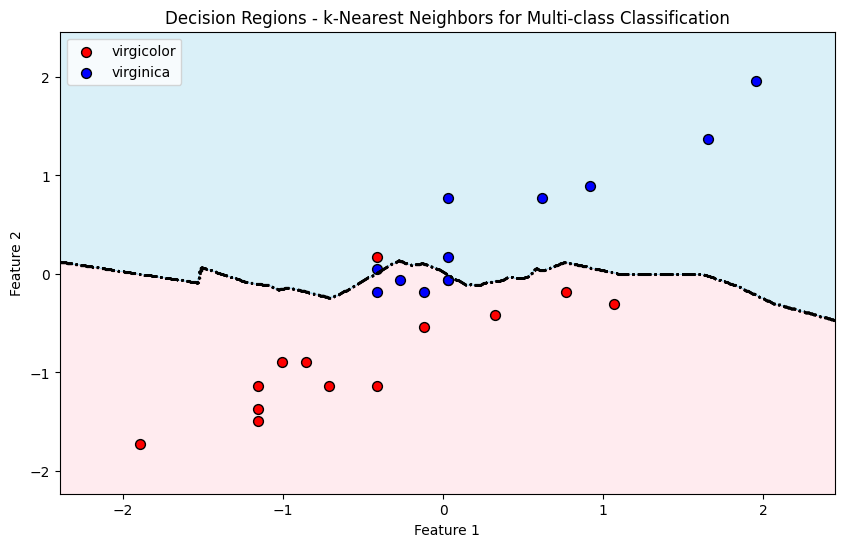


Evaluation metrics for Logistic Regression with micro-averaging:
Accuracy (micro): 0.84
Precision (micro): 0.84
Recall (micro): 0.84
F1-score (micro): 0.84

Evaluation metrics for Logistic Regression with macro-averaging:
Accuracy (macro): 0.84
Precision (macro): 0.8376623376623377
Recall (macro): 0.8376623376623377
F1-score (macro): 0.8376623376623377


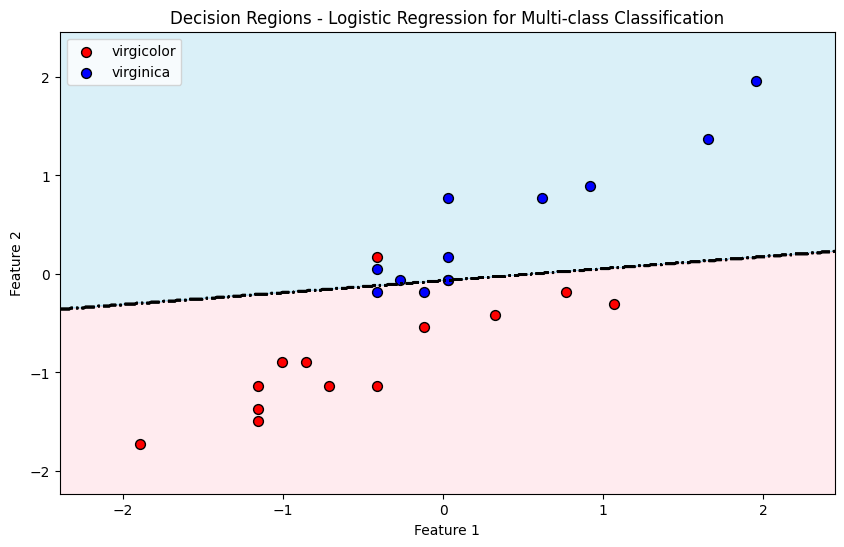


Evaluation metrics for SVM with micro-averaging:
Accuracy (micro): 0.84
Precision (micro): 0.84
Recall (micro): 0.84
F1-score (micro): 0.84

Evaluation metrics for SVM with macro-averaging:
Accuracy (macro): 0.84
Precision (macro): 0.8376623376623377
Recall (macro): 0.8376623376623377
F1-score (macro): 0.8376623376623377


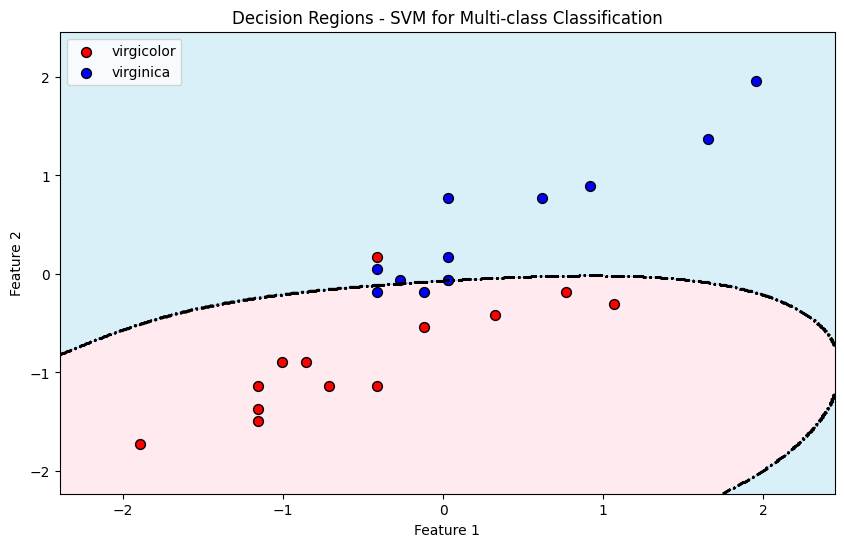


Evaluation metrics for Decision Tree with micro-averaging:
Accuracy (micro): 0.84
Precision (micro): 0.84
Recall (micro): 0.84
F1-score (micro): 0.84

Evaluation metrics for Decision Tree with macro-averaging:
Accuracy (macro): 0.84
Precision (macro): 0.8506944444444444
Recall (macro): 0.827922077922078
F1-score (macro): 0.8333333333333334


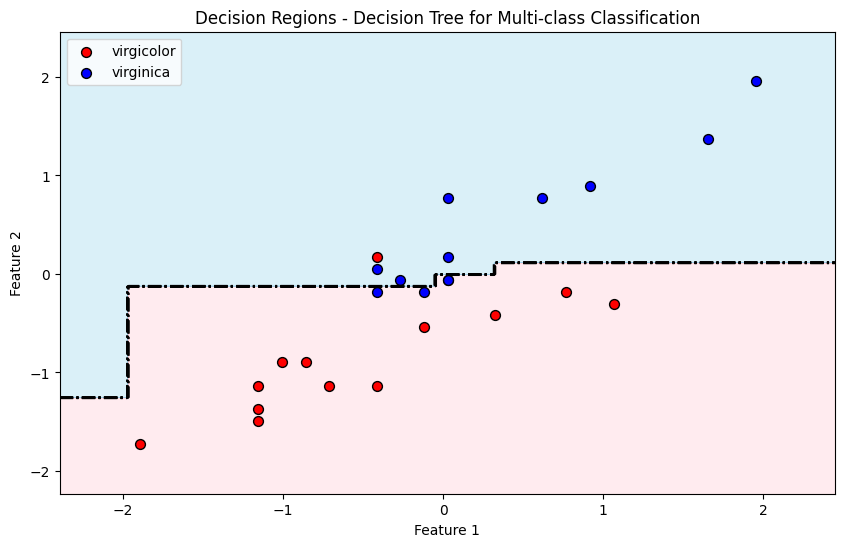


Evaluation metrics for Random Forest with micro-averaging:
Accuracy (micro): 0.84
Precision (micro): 0.84
Recall (micro): 0.84
F1-score (micro): 0.84

Evaluation metrics for Random Forest with macro-averaging:
Accuracy (macro): 0.84
Precision (macro): 0.8506944444444444
Recall (macro): 0.827922077922078
F1-score (macro): 0.8333333333333334


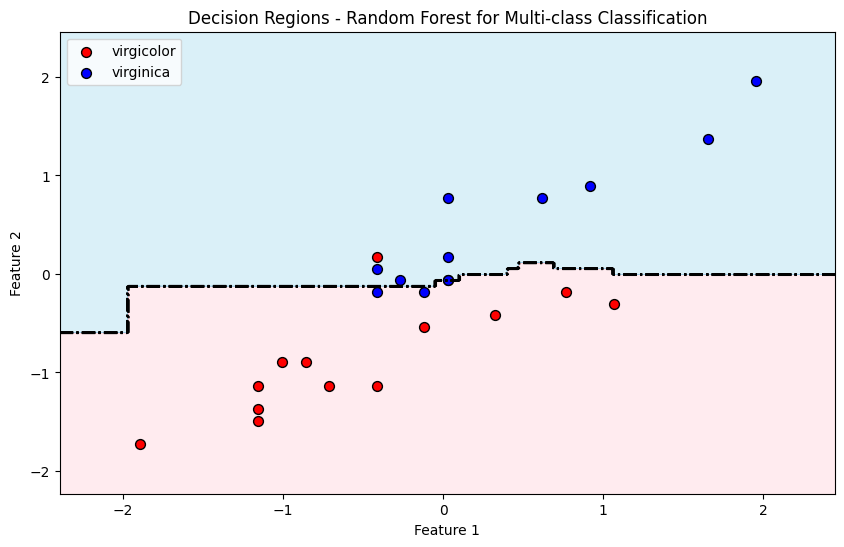

In [22]:
# Train, estimate, evaluate, and visualize each classifier for multi-class classification
for clf_name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_scaled, y_train)
    
    # Estimate
    y_pred = clf.predict(X_val_scaled)
    
    # Evaluate with micro-averaging
    accuracy_micro = accuracy_score(y_val, y_pred)
    precision_micro = precision_score(y_val, y_pred, average='micro')
    recall_micro = recall_score(y_val, y_pred, average='micro')
    f1_micro = f1_score(y_val, y_pred, average='micro')
    
    # Evaluate with macro-averaging
    accuracy_macro = accuracy_score(y_val, y_pred)
    precision_macro = precision_score(y_val, y_pred, average='macro')
    recall_macro = recall_score(y_val, y_pred, average='macro')
    f1_macro = f1_score(y_val, y_pred, average='macro')
    
    # Print evaluation metrics with micro-averaging
    print(f"\nEvaluation metrics for {clf_name} with micro-averaging:")
    print("Accuracy (micro):", accuracy_micro)
    print("Precision (micro):", precision_micro)
    print("Recall (micro):", recall_micro)
    print("F1-score (micro):", f1_micro)
    
    # Print evaluation metrics with macro-averaging
    print(f"\nEvaluation metrics for {clf_name} with macro-averaging:")
    print("Accuracy (macro):", accuracy_macro)
    print("Precision (macro):", precision_macro)
    print("Recall (macro):", recall_macro)
    print("F1-score (macro):", f1_macro)
    
    # Visualize decision region
    decision_region(X_val_scaled, y_val, clf, title=f'Decision Regions - {clf_name} for Multi-class Classification')


Based on the evaluation metrics with micro-averaging and macro-averaging:

#### KNN
Micro-averaging provides evaluation metrics by considering each instance individually, without considering the class imbalance. In this case, the accuracy, precision, recall, and F1-score are all 0.8. Micro-averaging is suitable when the dataset is imbalanced, and you want to give equal weight to each instance.

Macro-averaging computes the metric independently for each class and then takes the average. In this case, the accuracy remains 0.8, while precision and recall have slightly different values. Precision (macro) is 0.8199, indicating that, on average, 81.99% of the instances predicted as positive were true positives across all classes. Recall (macro) is 0.7825, meaning that, on average, 78.25% of the actual positive instances were correctly identified across all classes. The F1-score (macro) is 0.7878, which is the harmonic mean of precision (macro) and recall (macro) and provides a balanced measure of model performance across all classes.

#### Logistic Regression
Micro-averaging provides evaluation metrics by considering each instance individually, without considering the class imbalance. In this case, the accuracy, precision, recall, and F1-score are all 0.84. Micro-averaging is suitable when you want to give equal weight to each instance, regardless of class imbalance.

Macro-averaging computes the metric independently for each class and then takes the average. In this case, the accuracy remains 0.84, while precision, recall, and F1-score (macro) are also consistent at 0.8377. This means that, on average, precision, recall, and F1-score across all classes are approximately 83.77%.


#### Support Vector Machine (SVM)

Micro-averaging provides evaluation metrics by considering each instance individually, without considering the class imbalance. In this case, the accuracy, precision, recall, and F1-score are all 0.84. Micro-averaging is suitable when you want to give equal weight to each instance, regardless of class imbalance.

Macro-averaging computes the metric independently for each class and then takes the average. In this case, the accuracy remains 0.84, while precision, recall, and F1-score (macro) are also consistent at 0.8377. This means that, on average, precision, recall, and F1-score across all classes are approximately 83.77%

####  Decision Tree

Micro-averaging provides evaluation metrics by considering each instance individually, without considering the class imbalance. In this case, the accuracy, precision, recall, and F1-score are all 0.84. Micro-averaging is suitable when you want to give equal weight to each instance, regardless of class imbalance.

Macro-averaging computes the metric independently for each class and then takes the average. In this case, the accuracy remains 0.84. However, precision (macro) is slightly higher at 0.8507, indicating that, on average, 85.07% of the instances predicted as positive were true positives across all classes. Recall (macro) is slightly lower at 0.8279, meaning that, on average, 82.79% of the actual positive instances were correctly identified across all classes. The F1-score (macro) is 0.8333, which is the harmonic mean of precision (macro) and recall (macro) and provides a balanced measure of model performance across all classes.

####  Random Forest

Micro-averaging provides evaluation metrics by considering each instance individually, without considering the class imbalance. In this case, the accuracy, precision, recall, and F1-score are all 0.84. Micro-averaging is suitable when you want to give equal weight to each instance, regardless of class imbalance.

Macro-averaging computes the metric independently for each class and then takes the average. In this case, the accuracy remains 0.84. However, precision (macro) is slightly higher at 0.8507, indicating that, on average, 85.07% of the instances predicted as positive were true positives across all classes. Recall (macro) is slightly lower at 0.8279, meaning that, on average, 82.79% of the actual positive instances were correctly identified across all classes. The F1-score (macro) is 0.8333, which is the harmonic mean of precision (macro) and recall (macro) and provides a balanced measure of model performance across all classes.